<a href="https://colab.research.google.com/github/Brubbs/DataBase/blob/main/TRANSFERLEARNINGupandoprocolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
import os
import shutil
import zipfile
from google.colab import files  # Remova esta linha se não estiver usando Google Colab

# Etapa 1: Fazer upload do arquivo manualmente
print("Por favor, faça o upload do arquivo ZIP:")
uploaded = files.upload()  # Essa linha é específica para Google Colab

# Pega o nome do arquivo enviado
filename = next(iter(uploaded.keys()))  # Obtém o nome do arquivo enviado pelo usuário
print(f"Arquivo '{filename}' enviado com sucesso.")

# Etapa 2: Mover o arquivo para o diretório /tmp/
dest_path = "/tmp/cats-and-dogs.zip"  # Definir caminho de destino
shutil.move(filename, dest_path)
print(f"Arquivo movido para {dest_path}")

# Etapa 3: Extrair o conteúdo do arquivo ZIP
try:
    with zipfile.ZipFile(dest_path, 'r') as zip_ref:
        extract_path = "/tmp/"  # Local para onde os arquivos serão extraídos
        zip_ref.extractall(extract_path)
    print(f"Arquivos extraídos com sucesso em {extract_path}")
except zipfile.BadZipFile:
    print("Erro: O arquivo enviado não é um ZIP válido.")

Por favor, faça o upload do arquivo ZIP:


Saving PetImages.zip to PetImages.zip
Arquivo 'PetImages.zip' enviado com sucesso.
Arquivo movido para /tmp/cats-and-dogs.zip
Arquivos extraídos com sucesso em /tmp/


In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))


333
316


In [ ]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
#REDE INCEPTIONV3

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if  os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)
#


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))


330
314
65
62


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150,150))

Found 644 images belonging to 2 classes.
Found 127 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              epochs=15,
                              steps_per_epoch=90,
                              validation_data=validation_generator,
                              validation_steps=6)
#

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 7/90 ━━━━━━━━━━━━━━━━━━━━ 3:20 2s/step - acc: 0.5094 - loss: 1.8939

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - acc: 0.4979 - loss: 1.5772 - val_acc: 0.5512 - val_loss: 0.6916
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 169ms/step - acc: 0.5168 - loss: 0.6951 - val_acc: 0.4882 - val_loss: 0.6859
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - acc: 0.5761 - loss: 0.6896 - val_acc: 0.6614 - val_loss: 0.6800
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - acc: 0.5794 - loss: 0.6877 - val_acc: 0.7165 - val_loss: 0.6751
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - acc: 0.6224 - loss: 0.6955 - val_acc: 0.6772 - val_loss: 0.6749
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 206ms/step - acc: 0.5947 - loss: 0.6718 - val_acc: 0.4882 - val_loss: 0.6829
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - acc: 0.5771 - loss: 0.6681 - val_acc: 0.4961 - val_loss: 0.6727
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - acc: 0.6859 - loss: 0.6504 - val_acc: 0.4882 - val_loss: 0.9336
Epoch 9/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - acc:

Text(0.5, 1.0, 'Training and validation Loss')

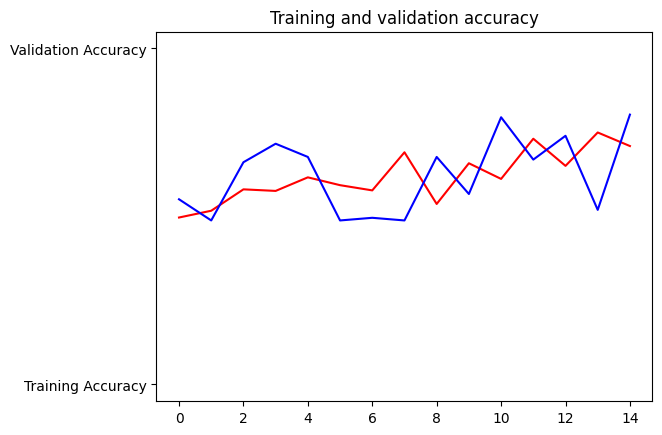

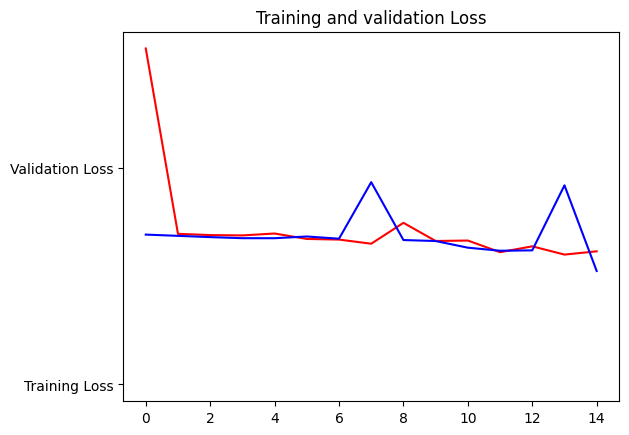

In [25]:
import IPython
%matplotlib inline

import matplotlib.image  as mp
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #Get number os Epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation Loss')